                                  Crime     2012     2013     2014     2015  \
0         ACTS INTENDED TO CAUSE INJURY  15843.0  16043.0  16806.0  18085.0   
1  FRAUD DECEPTION AND RELATED OFFENCES   2372.0   2566.0   2702.0   2936.0   
2         HOMICIDE AND RELATED OFFENCES     59.0     54.0     61.0     57.0   
3     OTHER OFFENCES AGAINST THE PERSON   3165.0   3053.0   3280.0   3623.0   
4     PROPERTY DAMAGE AND ENVIRONMENTAL  29126.0  26782.0  23274.0  23134.0   
5          ROBBERY AND RELATED OFFENCES   1031.0    829.0    794.0    643.0   
6             SERIOUS CRIMINAL TRESPASS  18763.0  16614.0  15256.0  15591.0   

      2016     2017  
0  17595.0  16717.0  
1   2854.0   2956.0  
2     57.0     69.0  
3   3035.0   2953.0  
4  22505.0  21342.0  
5    621.0    512.0  
6  16931.0  15058.0  


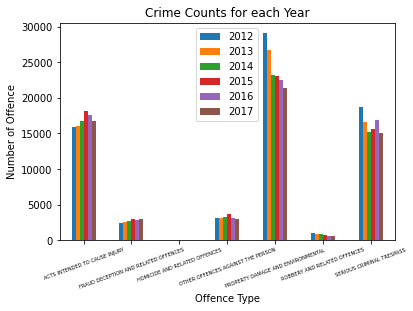

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np

df = pd.read_csv('combine.csv')
df['date'] = pd.to_datetime(df['Reported Date'])
df['year'] = df['date'].dt.year
df = df.groupby(by = ['Offence Level 2 Description', 'year']).agg({'Offence count':sum})
df.reset_index(inplace=True)

off = df['Offence Level 2 Description'].tolist()
count = df['Offence count'].tolist()
year = df['year'].tolist()

ls_off = []
type = []

for i in range(len(off)):
    if off[i] not in type:
        type.append(off[i])

for j in range(len(type)):
    ls_off.append([type[j]])
    for i in range(len(year)):
        if year[i] == 2012 and type[j]==off[i]:
            ls_off[j].append(count[i])
        elif year[i] == 2013 and type[j]==off[i]:
            ls_off[j].append(count[i])
        elif year[i] == 2014 and type[j]==off[i]:
            ls_off[j].append(count[i])
        elif year[i] == 2015 and type[j]==off[i]:
            ls_off[j].append(count[i])
        elif year[i] == 2016 and type[j]==off[i]:
            ls_off[j].append(count[i])
        elif year[i] == 2017 and type[j]==off[i]:
            ls_off[j].append(count[i])


df = pd.DataFrame([ls_off[0], ls_off[1], ls_off[2], ls_off[3], ls_off[4], ls_off[5], ls_off[6]], 
                  columns=['Crime', '2012', '2013', '2014', '2015', '2016', '2017'])

print(df)

df.plot(x='Crime',
        kind='bar',
        stacked=False,
        title='Crime Counts for each Year')

plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.xticks(size = 5, rotation=20)
plt.show()
df.to_csv("crimetypedata.csv")

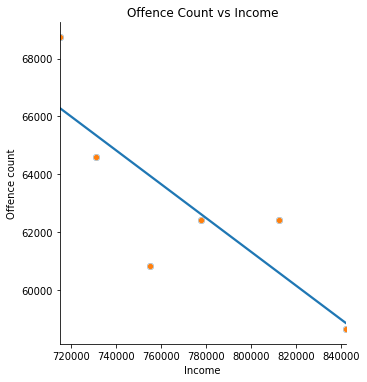

Pearsons correlation: -0.819


In [2]:
import pandas as pd
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('ex_prepdata.csv')
df.reset_index(inplace=True)
# use lmplot
sns.lmplot(x = "Income",
            y = "Offence count", 
            ci = None,
            data = df)
sns.scatterplot(data = df, x = "Income", y = "Offence count")
plt.title('Offence Count vs Income')
plt.show()

corr,_ = pearsonr(df["Income"], df["Offence count"])
print('Pearsons correlation: %.3f' % corr)

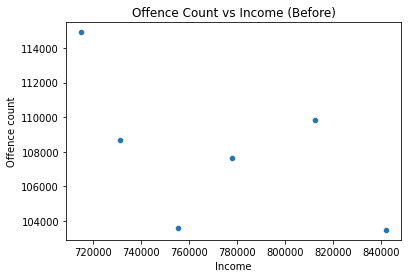

In [3]:
import pandas as pd
import argparse
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('prepdata.csv')
df.reset_index(inplace=True)

sns.scatterplot(data = df, x = "Income", y = "Offence count")
plt.title('Offence Count vs Income (Before)')
plt.show()
